In [23]:
import pandas as pd

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.cluster import KMeans

In [26]:
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('Marine_Fish_Data.csv')


In [28]:
relevant_columns = ['Fish_Population', 'Average_Size(cm)', 'Water_Temperature(C)', 
                    'Water_Pollution_Level', 'Overfishing_Risk']
data = data[relevant_columns]

# Drop missing values
data = data.dropna()  

In [29]:
# Encode categorical variables
data['Water_Pollution_Level'] = data['Water_Pollution_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
data['Overfishing_Risk'] = data['Overfishing_Risk'].map({'Yes': 1, 'No': 0})

# Standardize numeric columns
scaler = StandardScaler()
numeric_columns = ['Fish_Population', 'Average_Size(cm)', 'Water_Temperature(C)']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


print(data.head())

   Fish_Population  Average_Size(cm)  Water_Temperature(C)  \
0         1.040265          0.637468              0.488523   
1        -1.484373          1.175206             -0.280642   
2         0.299810          1.283075             -1.279408   
3         0.221432          1.180419              1.367897   
4         0.435297         -0.307684              0.646948   

   Water_Pollution_Level  Overfishing_Risk  
0                      3                 0  
1                      3                 0  
2                      2                 0  
3                      1                 1  
4                      1                 1  


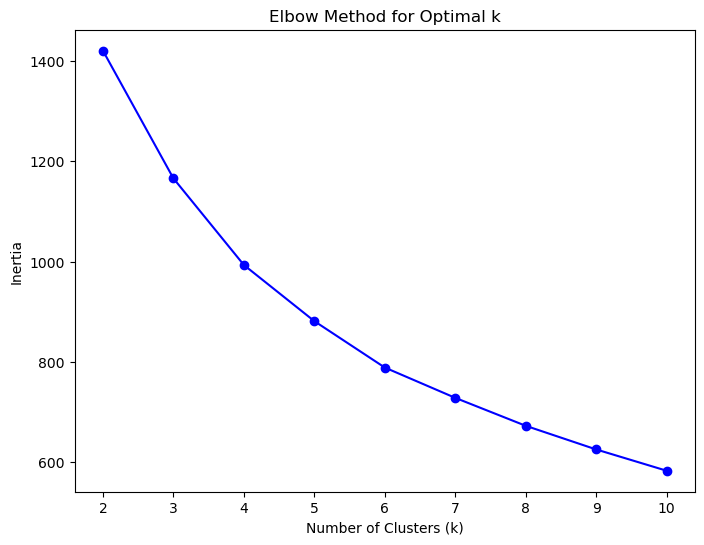

In [30]:
# Defining features for clustering
X = data[['Fish_Population', 'Average_Size(cm)', 'Water_Temperature(C)', 'Water_Pollution_Level']]

# Initialize a list to store the inertia values
inertia = []

# Test a range of k values (e.g., from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [31]:
optimal_k = 4  

# Run K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Displaying clustered data
print(data.head())


   Fish_Population  Average_Size(cm)  Water_Temperature(C)  \
0         1.040265          0.637468              0.488523   
1        -1.484373          1.175206             -0.280642   
2         0.299810          1.283075             -1.279408   
3         0.221432          1.180419              1.367897   
4         0.435297         -0.307684              0.646948   

   Water_Pollution_Level  Overfishing_Risk  Cluster  
0                      3                 0        3  
1                      3                 0        0  
2                      2                 0        0  
3                      1                 1        1  
4                      1                 1        3  


In [32]:
# View the centroids of the clusters
print(kmeans.cluster_centers_)


[[ 0.1127455   0.6662331  -1.09226457  2.04032258]
 [ 0.18589031  0.95375966  0.82548955  1.69724771]
 [-1.10505148 -0.67872803 -0.05087158  2.11764706]
 [ 0.88583599 -0.71958546  0.39985482  2.23664122]]


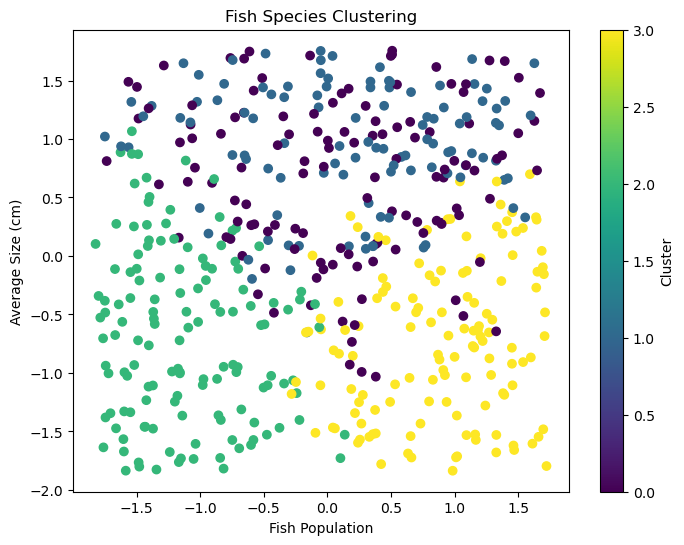

In [33]:
#Visualizing the plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Fish_Population'], data['Average_Size(cm)'], c=data['Cluster'], cmap='viridis')
plt.title('Fish Species Clustering')
plt.xlabel('Fish Population')
plt.ylabel('Average Size (cm)')
plt.colorbar(label='Cluster')
plt.show()